In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_spss("Birthweight_reduced_kg_SPSS.sav")

In [29]:
df.head(42)

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,Non-smoker,162.0,57.0,23.0,10.0,35.0,179.0,Not low birthweight,Aged < 35,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,Non-smoker,171.0,62.0,19.0,12.0,0.0,183.0,Not low birthweight,Aged < 35,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,Non-smoker,172.0,58.0,31.0,16.0,25.0,185.0,Not low birthweight,Aged 35+,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,Non-smoker,174.0,68.0,26.0,14.0,25.0,189.0,Not low birthweight,Aged < 35,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,Non-smoker,175.0,66.0,30.0,12.0,0.0,184.0,Not low birthweight,Aged < 35,0.0
5,1636.0,38.0,51.0,3.93,38.0,29.0,Non-smoker,165.0,61.0,31.0,16.0,0.0,180.0,Not low birthweight,Aged < 35,0.0
6,820.0,34.0,52.0,3.77,40.0,24.0,Non-smoker,157.0,50.0,31.0,16.0,0.0,173.0,Not low birthweight,Aged < 35,0.0
7,1191.0,33.0,53.0,3.65,42.0,21.0,Non-smoker,165.0,61.0,21.0,10.0,25.0,185.0,Not low birthweight,Aged < 35,0.0
8,1081.0,38.0,54.0,3.63,38.0,18.0,Non-smoker,172.0,50.0,20.0,12.0,7.0,172.0,Not low birthweight,Aged < 35,0.0
9,822.0,35.0,50.0,3.42,38.0,20.0,Non-smoker,157.0,48.0,22.0,14.0,0.0,179.0,Not low birthweight,Aged < 35,0.0


### Q1. What is the mean father’s age?

In [4]:
father_age_mean = df [['fage']].mean()
father_age_mean

fage    28.904762
dtype: float64

### Q2. What is the mean father’s age for low birthweight babies?

In [5]:
df[df['lowbwt'] == 'Not low birthweight'].shape[0]

36

In [6]:
df[df['lowbwt'] == 'Low birthweight'].shape[0]

6

In [7]:
df_low_birthweight = df[(df.lowbwt == 'Low birthweight')]
df_low_birthweight

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
19,1313.0,32.0,43.0,2.65,33.0,24.0,Non-smoker,149.0,45.0,26.0,16.0,0.0,169.0,Low birthweight,Aged < 35,0.0
23,569.0,35.0,50.0,2.51,39.0,22.0,Smoker,159.0,52.0,23.0,14.0,25.0,200.0,Low birthweight,Aged < 35,7.0
24,1363.0,30.0,48.0,2.37,37.0,20.0,Smoker,163.0,47.0,20.0,10.0,35.0,185.0,Low birthweight,Aged < 35,7.0
25,300.0,32.0,46.0,2.05,35.0,41.0,Smoker,166.0,57.0,37.0,14.0,25.0,173.0,Low birthweight,Aged 35+,7.0
26,431.0,30.0,48.0,1.92,33.0,20.0,Smoker,161.0,50.0,20.0,10.0,35.0,180.0,Low birthweight,Aged < 35,7.0
40,516.0,33.0,47.0,2.66,35.0,20.0,Smoker,170.0,57.0,23.0,12.0,50.0,186.0,Low birthweight,Aged < 35,35.0


In [8]:
father_mean_2 = df_low_birthweight[['fage']].mean()
father_mean_2

fage    24.833333
dtype: float64

### Q3. Is the father's age normally distributed? Justify your answer.

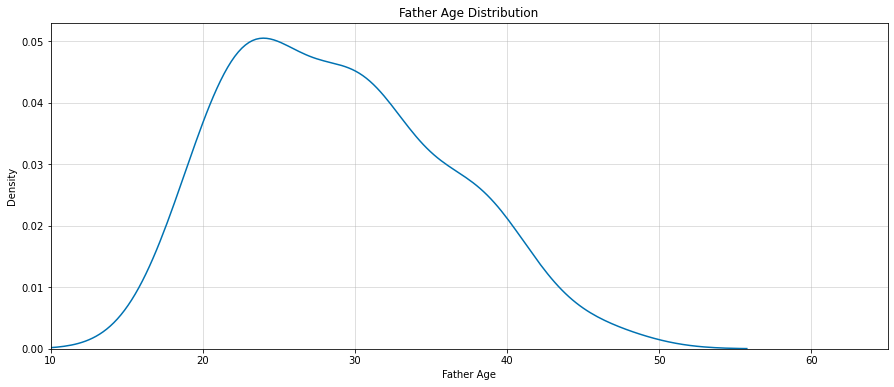

In [9]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df['fage'], label = 'Father Age')

plt.xlim(left=10, right=65)
plt.xlabel('Father Age')
plt.ylabel('Density')
plt.title('Father Age Distribution');

In [10]:
a = list(df["fage"])

In [11]:
shapiro_test = stats.shapiro(a)
shapiro_test

ShapiroResult(statistic=0.9436862468719482, pvalue=0.03849918395280838)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.038 < 0.05 so distribution of  age for fathers are not normally distributed.

In [12]:
df[['fage']].mean()

fage    28.904762
dtype: float64

In [13]:
df[['fage']].median()

fage    29.5
dtype: float64

### Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?

In [14]:
data = list(df["fage"])

In [15]:
data_log = np.log(data)
data_log

array([3.13549422, 2.94443898, 3.4339872 , 3.25809654, 3.40119738,
       3.4339872 , 3.4339872 , 3.04452244, 2.99573227, 3.09104245,
       3.61091791, 3.36729583, 3.55534806, 3.21887582, 3.40119738,
       3.66356165, 3.29583687, 3.21887582, 3.13549422, 3.25809654,
       3.17805383, 3.17805383, 2.99573227, 3.13549422, 2.99573227,
       3.61091791, 2.99573227, 3.63758616, 3.71357207, 3.61091791,
       3.63758616, 3.4657359 , 3.17805383, 3.40119738, 3.68887945,
       3.8286414 , 3.40119738, 3.13549422, 3.4657359 , 3.4339872 ,
       3.13549422, 3.4339872 ])

In [16]:
data_log.mean()

3.3370421189026085

### Q5. Is the above mean score a good representation of the real value? Justify your answer.

In [17]:
shapiro_test_2 = stats.shapiro(data_log)
shapiro_test_2

ShapiroResult(statistic=0.9583315253257751, pvalue=0.12867699563503265)

Transformed Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.128 > 0.05 so distribution of log transform of fathers age are  normally distributed

### Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.

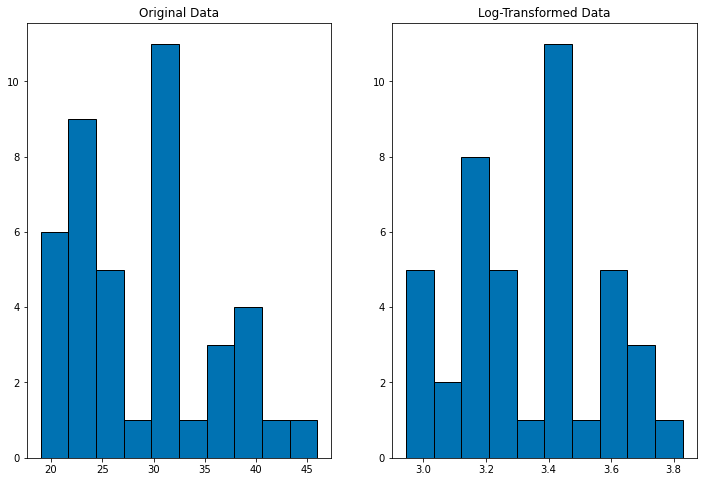

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data');

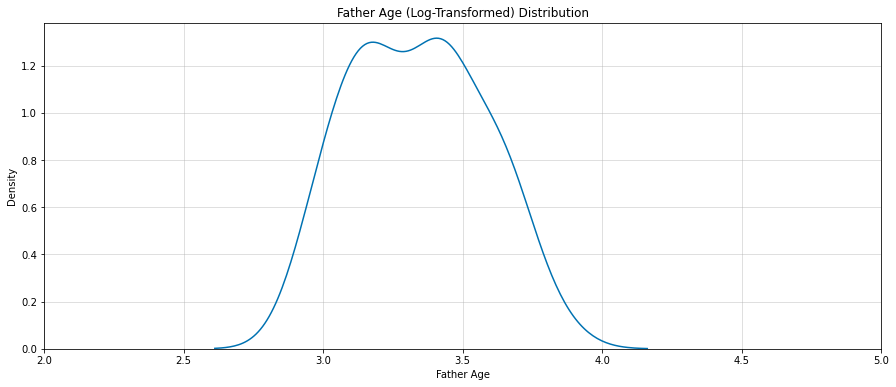

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data_log, label = 'Father Age')

plt.xlim(left=2, right=5)
plt.xlabel('Father Age')
plt.ylabel('Density')
plt.title('Father Age (Log-Transformed) Distribution');

The log-transformed distribution is more normally distributed compared to the original distribution.

### Q7. Is the variable “years father was in education” normally distributed? 

In [19]:
b = list(df["fedyrs"])

In [20]:
shapiro_test_3 = stats.shapiro(b)
shapiro_test_3

ShapiroResult(statistic=0.8441449403762817, pvalue=4.483600059757009e-05)

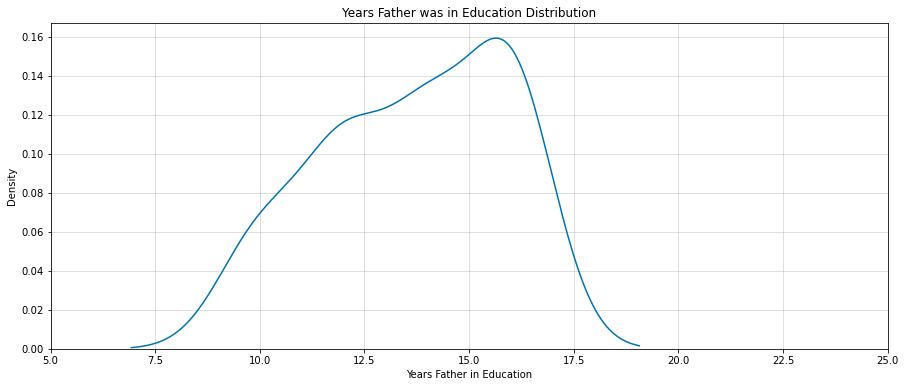

In [57]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df['fedyrs'], label = 'Years Father was in Education')

plt.xlim(left=5, right=25)
plt.xlabel('Years Father in Education')
plt.ylabel('Density')
plt.title('Years Father was in Education Distribution');

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 4.483* 10 ^-5 < 0.05 so distribution of year fathers was in education are not normally distributed.

### Q8. Mentioning the null and alternative hypotheses, explain the above answer. 

#### Null Hypotheses:

The variable “years father was in education” is not normally distributed.

#### Alternative Hypotheses:

The variable “years father was in education” is normally distributed.

### Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?

In [22]:
data_2 = list(df["fedyrs"])

In [23]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_2)

Lambda value used for Transformation: 2.2314161300163327


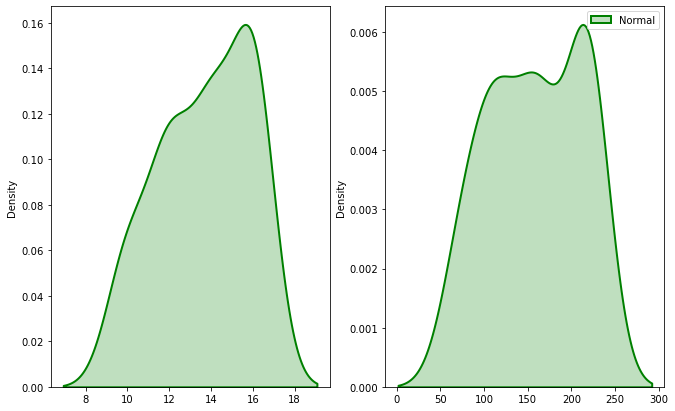

In [63]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(7)
fig.set_figwidth(11)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [24]:
fitted_data

array([ 75.90651661, 114.24088196, 217.47942781, 161.32559106,
       114.24088196, 217.47942781, 217.47942781,  75.90651661,
       114.24088196, 161.32559106, 161.32559106, 217.47942781,
       217.47942781, 161.32559106, 217.47942781,  75.90651661,
       161.32559106, 114.24088196, 161.32559106, 217.47942781,
       114.24088196, 217.47942781, 161.32559106, 161.32559106,
        75.90651661, 161.32559106,  75.90651661, 161.32559106,
       114.24088196, 114.24088196, 161.32559106, 114.24088196,
       114.24088196, 217.47942781, 217.47942781, 217.47942781,
        75.90651661, 217.47942781, 217.47942781, 217.47942781,
       114.24088196, 217.47942781])

In [25]:
fitted_data.mean()

157.96716280846272

In [26]:
non_normal_data_mean = statistics.mean(data_2)
non_normal_data_mean

13.666666666666666

### Q10. Is this new variable normally distributed? Explain.

In [27]:
shapiro_test_4 = stats.shapiro(fitted_data)
shapiro_test_4

ShapiroResult(statistic=0.8429067730903625, pvalue=4.183058990747668e-05)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 4.183* 10 ^-5 < 0.05 so distribution of year fathers was in education are not normally distributed.

### Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?

In [28]:
df[df['mage'] <= 35 ].shape[0]

39

In [30]:
df_mother = df[(df.mage <= 35)]

In [31]:
B_C_transformed_fathers = list(df_mother["fedyrs"])

In [32]:
fitted_data_2, lambdaValue = stats.boxcox(B_C_transformed_fathers) 

In [33]:
fitted_data_2

array([37.09667429, 52.1058319 , 88.86027182, 69.37876316, 52.1058319 ,
       88.86027182, 88.86027182, 37.09667429, 52.1058319 , 69.37876316,
       69.37876316, 88.86027182, 88.86027182, 69.37876316, 88.86027182,
       37.09667429, 69.37876316, 52.1058319 , 69.37876316, 88.86027182,
       52.1058319 , 88.86027182, 69.37876316, 69.37876316, 37.09667429,
       37.09667429, 69.37876316, 52.1058319 , 52.1058319 , 69.37876316,
       52.1058319 , 52.1058319 , 88.86027182, 88.86027182, 37.09667429,
       88.86027182, 88.86027182, 88.86027182, 52.1058319 ])

In [34]:
fitted_data_2.mean()

66.47716743791263

### Q12. Which test would you use to investigate the relationship between birth weight and father's age?
Pearson product-moment correlation,
Spearman’s Rank order correlation,
Point-Biserial correlation,
Phi-Coefficient

* Pearson product-moment correlation

In [35]:
Birthweight = list(df['Birthweight'])
Father_age = list(df['fage'])
Pearson = np.corrcoef(Birthweight, Father_age)

print(Pearson)

[[1.         0.17570999]
 [0.17570999 1.        ]]


* +1 - Complete positive correlation
* +0.8 - Strong positive correlation
* +0.6 - Moderate positive correlation
* 0 - no correlation whatsoever
* -0.6 - Moderate negative correlation
* -0.8 - Strong negative correlation
* -1 - Complete negative correlation

The statistical test reports a weak positive correlation with a value of 0.175. 

* Spearman’s Rank order correlation

In [37]:
from scipy.stats import spearmanr

In [38]:
coef, p = spearmanr(Birthweight, Father_age)

In [39]:
coef

0.17810631240688332

In [40]:
p

0.25911799368781196

The statistical test reports a weak positive correlation with a value of 0.178. 

* Point-Biserial correlation

In [41]:
stats.pointbiserialr(Birthweight, Father_age)

PointbiserialrResult(correlation=0.17570999332980186, pvalue=0.2656859138375593)

The statistical test reports a weak positive correlation with a value of 0.175.

* Phi-Coefficient

### Q13. Justify the above choice in terms of the distribution of data and the nature of the test.

In [42]:
coef, p = spearmanr(Birthweight, Father_age)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are uncorrelated (fail to reject H0) p=0.259


The statistical test reports a weak positive correlation with a value of 0.178. The p-value is not close to zero (0.05<0.259), which means that the likelihood of observing the data given that the samples are correlated and that we can not reject the null hypothesis.

### Q14. What is the direction of that relationship?

The statistical test reports a weak positive correlation with a value of 0.175.

### Q15. What is the form of that relationship?

In [44]:
import seaborn

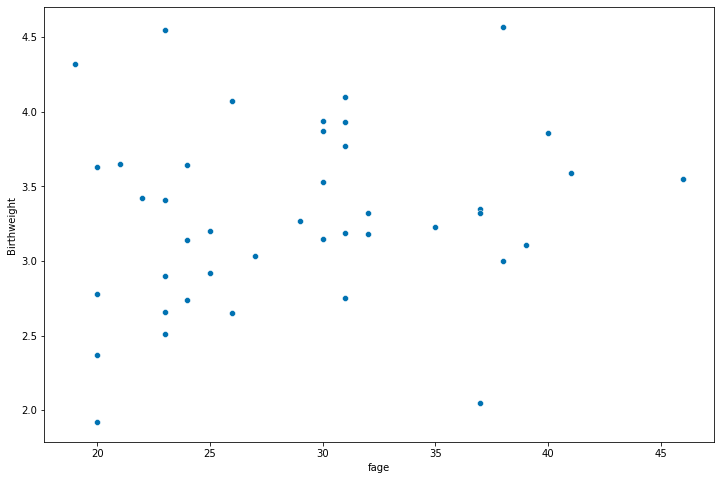

In [47]:
seaborn.scatterplot(y="Birthweight",
                    x="fage",
                    data=df);

The form of relationship is Linear

### Q16. What is the degree of that relationship?

The degree of relationship is Weak. 

### Q17. What test would you use to investigate the relationship between smoking and birth weight?

* Spearman’s Rank order correlation

In [58]:
smoking = list(df['smoker'])
smoking

['Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Non-smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker',
 'Smoker']

In [59]:
coef_2, p_2 = spearmanr(Birthweight, smoking)

In [61]:
coef_2

-0.29499658492702774

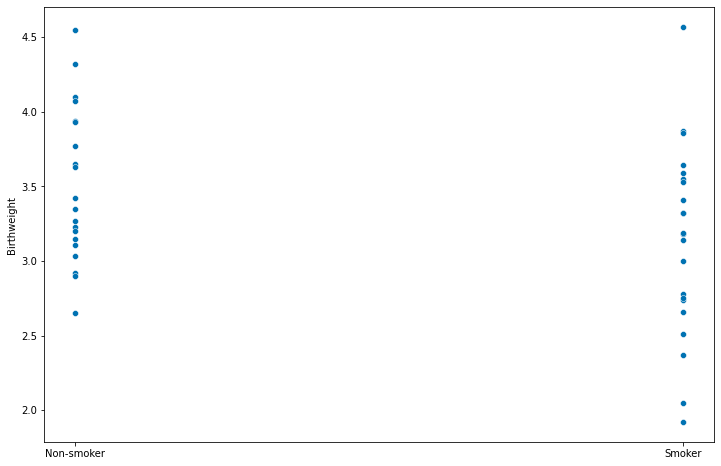

In [53]:
seaborn.scatterplot(y="Birthweight",
                    x=smoking,
                    data=df);

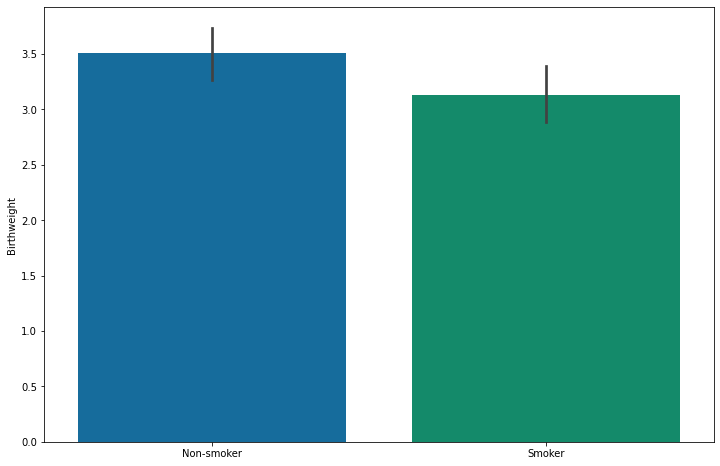

In [64]:
sns.barplot(y="Birthweight",
                    x=smoking,
                    data=df);

### Q18. Report on the above results including information about direction/form/degree of the relationship.

The statistical test reports a weak negative correlation with a value of -0.294.